In [88]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing

In [30]:
# Load the dataset
df = pd.read_csv("Housing.csv")

In [33]:
# Univariate Analysis
area = df["area"]
print(area.describe())

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64


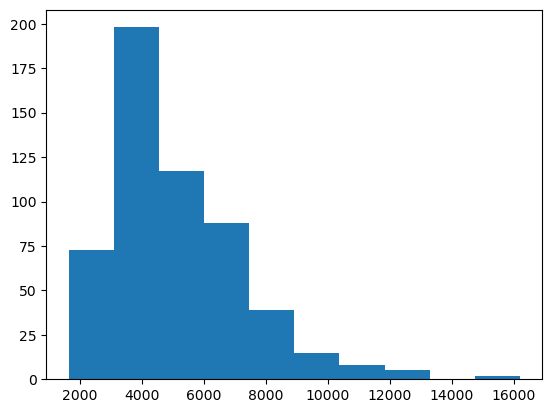

In [34]:
plt.hist(area)
plt.show()

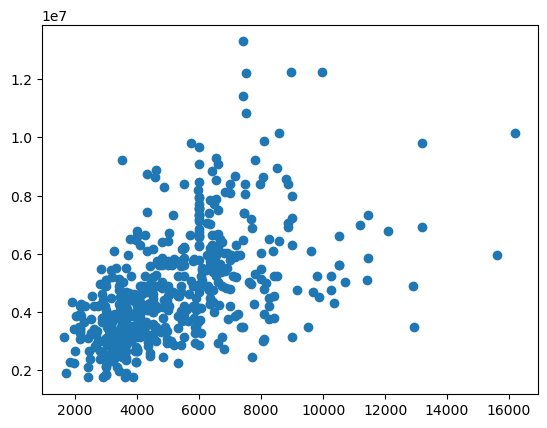

In [36]:
# Bivariate Analysis
# Plot a scatter plot of area against price
plt.scatter(area, df['price'])
plt.show()

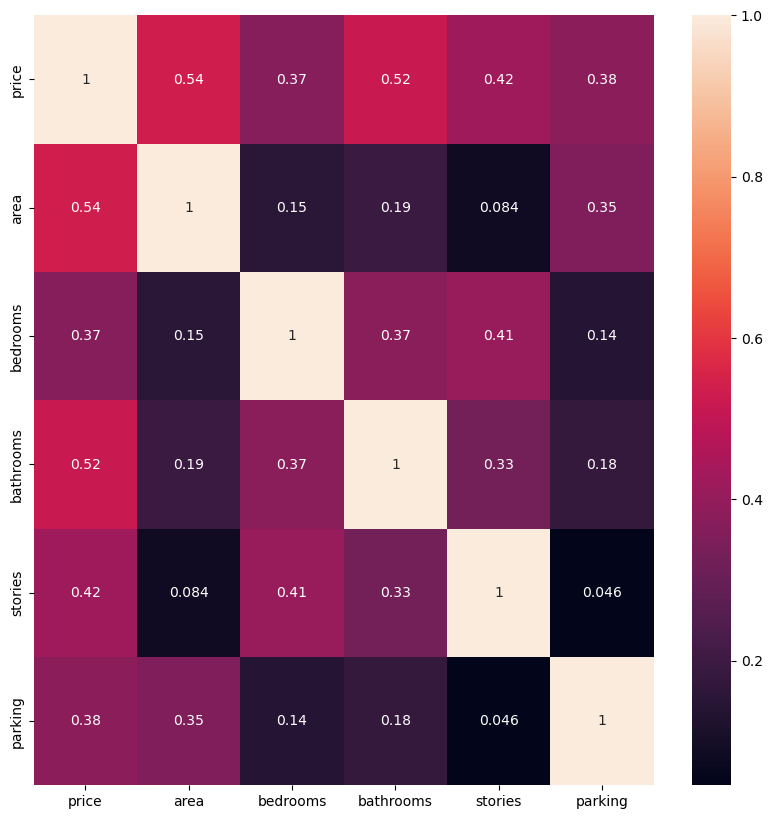

In [61]:
# Multivariate Analysis
# Plot a heatmap of the correlation between all the variables
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [45]:
#descriptive statistics
desc = df.describe()

In [46]:
print(desc)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


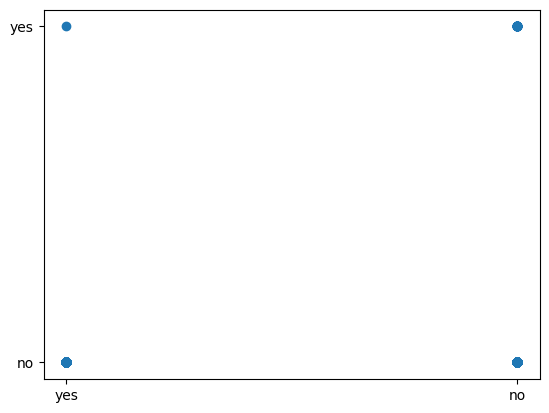

In [50]:
# Plot a scatterplot of the data
plt.scatter(df['airconditioning'], df['hotwaterheating'])
plt.show()

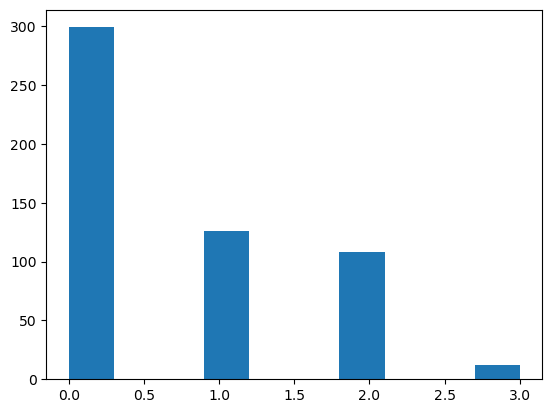

In [54]:
# Plot a boxplot of the data
plt.hist(df['parking'])
plt.show()

In [55]:
# Check for missing values
missing_values = df.isnull().sum()

In [56]:
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


In [62]:
# Calculate the IQR
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

In [63]:
# Identify the outliers
outliers = df[(df < q1 - 1.5 * iqr) | (df > q3 + 1.5 * iqr)]
# Replace the outliers with the mean
outliers.fillna(df.mean(), inplace=True)
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [64]:
# Check for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [68]:
# Encode the categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [69]:
df.to_csv('encoded_dataset.csv')

In [71]:
# Split the data into dependent and independent variables.
X = df[["area", "price", "parking"]]
y = df["stories"]

In [72]:
print(X)

     area     price  parking
0    7420  13300000        2
1    8960  12250000        3
2    9960  12250000        2
3    7500  12215000        3
4    7420  11410000        2
..    ...       ...      ...
540  3000   1820000        2
541  2400   1767150        0
542  3620   1750000        0
543  2910   1750000        0
544  3850   1750000        0

[545 rows x 3 columns]


In [74]:
print(y)

0      3
1      4
2      2
3      2
4      2
      ..
540    1
541    1
542    1
543    1
544    2
Name: stories, Length: 545, dtype: int64


In [81]:
#Scaling the independent variables
scaler = sklearn.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 1.04672629  4.56636513  1.51769249]
 [ 1.75700953  4.00448405  2.67940935]
 [ 2.21823241  4.00448405  1.51769249]
 ...
 [-0.70592066 -1.61432675 -0.80574124]
 [-1.03338891 -1.61432675 -0.80574124]
 [-0.5998394  -1.61432675 -0.80574124]]


In [83]:
# Create a new column for the training/testing split
df['is_training'] = np.random.randint(0, 2, size=df.shape[0])

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.33, random_state=42)

# Saving the training and testing DataFrames to separate files
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

In [85]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [101]:
# Train the Model
clf.fit(X_train, y_train)

LogisticRegression()

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

y_pred = clf.predict(X_test)
# Calculate the accuracy, precision, recall, and F1 score
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Print the metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.48905109489051096
Precision: 0.3220204274891775
Recall: 0.32075131462608775
F1 score: 0.31546048247367714
